In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from glob import glob
import json

# Function to parse log files and extract data
def parse_log_files(result_root_directory):
    performance_data = {}

    result_files = glob(result_root_directory + '/*/*.json')
    for result_file in result_files:
        with open(result_file, 'r') as file:
            result = json.load(file)
            model_name = result['model_name']
            if model_name not in performance_data:
                performance_data[model_name] = {}

            for task, value in result['results'].items():
                if value['alias'] != task:
                    continue
                if "acc_norm,none" in value:
                    accuracy = value["acc_norm,none"]
                elif "acc,none" in value:
                    accuracy = value["acc,none"]
                elif "exact_match,remove_whitespace" in value:
                    accuracy = value["exact_match,remove_whitespace"]
                else:
                    accuracy = None
                    
                performance_data[model_name][task] = accuracy

    return performance_data

# Function to plot radar chart
def plot_radar_chart(performance_data):
    labels = list(performance_data[next(iter(performance_data))].keys())
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for model, performance in performance_data.items():
        values = list(performance.values())
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
        # ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title('Model Performance Comparison')
    plt.show()




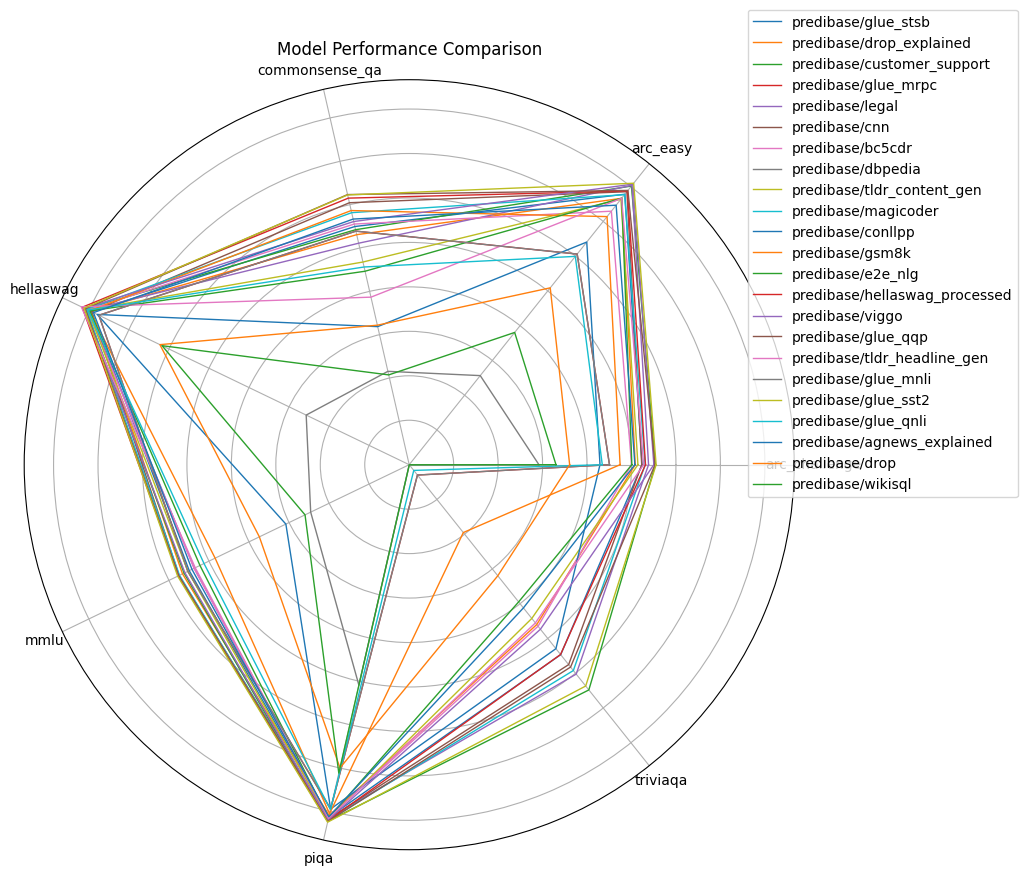

In [33]:
# Main execution
log_directory = './results'  # Change this to the path of your log files
performance_data = parse_log_files(log_directory)
plot_radar_chart(performance_data)